# Explore: Single Column Model 

This notebook provides an interactive plot that in its default mode, solves the one-dimensional steady-state equilibrium transport model described in @spiegelman2000. The model is initialized the model, we solve for a single column and plot the results and for comparison the disequilibrium transport model can also be selected

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import UserCalc

The next cell below will read in the input data using the user filename (e.g. `'sample'`):

In [2]:
runname = 'sample'
input_file = 'data/{}.csv'.format(runname)
df = pd.read_csv(input_file, skiprows=1, dtype=float)

#### Single column equilibrium transport model

In its default mode, `UserCalc` solves the one-dimensional steady-state equilibrium transport model described in @spiegelman2000. Below we will initialize the model, solve for a single column and plot the results.

First we set the physical parameters for the upwelling column and initial conditions:

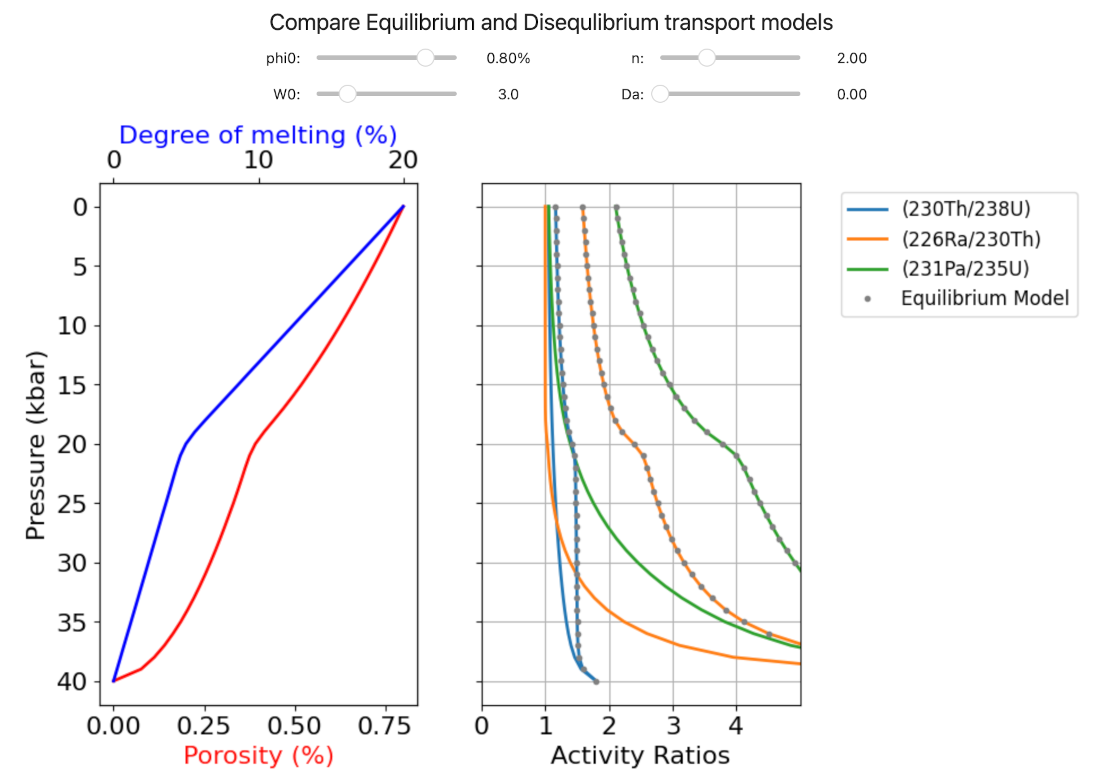

In [9]:
#| label: elkins2021-plot

import ipywidgets as widgets
from ipywidgets import VBox, HBox

def plot(phi0 = 0.008, W0 = 3., n = 2., Da=10.):
    """
    Parameters
    ----------
    phi0 : float
        Maximum melt porosity
    W0 : float
        Solid upwelling rate in cm/yr. (to be converted to km/yr. in the driver function)
    n : float
        Permeability exponent
    """
    # Initial activity values (default is 1.0):
    alpha0_238U = 1.
    alpha0_235U = 1.
    alpha0_230Th = 1.
    alpha0_226Ra = 1.
    alpha0_231Pa = 1.
    
    alpha0_all = np.array([alpha0_238U, alpha0_230Th, alpha0_226Ra, alpha0_235U, alpha0_231Pa])
    
    # model = UserCalc.EquilTransport if model_name == 'EquilTransport' else UserCalc.DisequilTransport
    
    us = UserCalc.UserCalc(df, model=UserCalc.EquilTransport, Da=Da)
    df_out_eq = us.solve_all_1D(phi0, n, W0, alpha0_all)
    # fig = UserCalc.plot_1Dcolumn(df_out_eq)

    us_diseq = UserCalc.UserCalc(df, model=UserCalc.DisequilTransport, Da=Da)
    df_out = us_diseq.solve_all_1D(phi0,n,W0,alpha0_all)

    fig, axes = UserCalc.plot_1Dcolumn(df_out)
    axes[2].set_prop_cycle(None)
    for s in ['(230Th/238U)','(226Ra/230Th)','(231Pa/235U)']:
            axes[2].plot(df_out_eq[s],df_out['P'],'-')
            axes[2].plot(df_out_eq[s],df_out['P'],'.',color='grey', label="Equilibrium Model")

    axes[2].get_legend().remove()
    handles, labels = axes[2].get_legend_handles_labels()
    axes[2].legend(handles[0:4], labels[0:4], loc="upper right", bbox_to_anchor=(1.9, 1), fontsize=12)
    
    plt.show()


w_phi0 = widgets.FloatSlider(0.008, min=0.001, max=0.01, step=0.0005, readout_format='.2%', description="phi0:")
w_W0 = widgets.FloatSlider(3., min=1., max=10., step=0.1, readout_format='.1f', description="W0:")
w_n = widgets.FloatSlider(2., min=1., max=4., step=0.1, readout_format='.2f', description="n:")
w_Da = widgets.FloatSlider(0., min=0., max=10., step=0.1, readout_format='.2f', description="Da:")

et_out = widgets.interactive_output(plot, dict(phi0=w_phi0, W0=w_W0, n=w_n, Da=w_Da))

title = widgets.HTML(value='<div style="text-align:center;font-size:20px">Compare Equilibrium and Disequlibrium transport models</div>')
controls = VBox([title, HBox([ VBox([w_phi0, w_W0]), VBox([w_n, w_Da]) ])])
plots = HBox([et_out])

ui = VBox([controls, plots], layout=widgets.Layout(display="flex", align_items="center"))
display(ui)